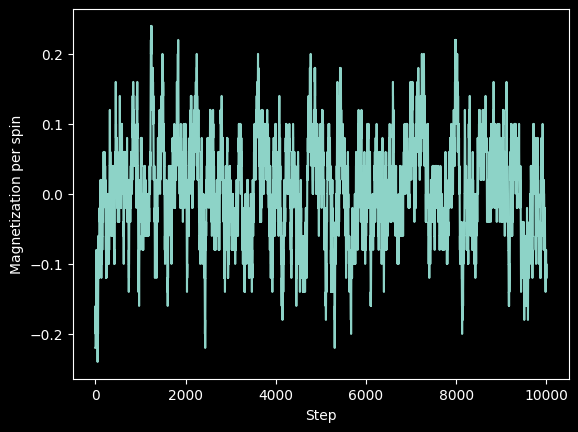

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def initial_lattice(size):
    """
    Initializes a square lattice of size 'size' with random spins (-1 or 1)
    """
    return np.random.choice([-1, 1], size=(size, size))


def energy_difference(lattice, i, j, h):
    """
    Calculates the energy difference resulting from flipping the spin at position (i,j)
    """
    size = lattice.shape[0]
    sigma = lattice[i, j]
    neighbour_sum = lattice[(i+1)%size, j] + lattice[(i-1)%size, j] + \
                    lattice[i, (j+1)%size] + lattice[i, (j-1)%size]
    return -2*sigma*(neighbour_sum + h)


def transition_probability(delta_e, temperature):
    """
    Calculates the transition probability for a given energy difference 'delta_e'
    at a temperature 'temperature'
    """
    if delta_e < 0:
        return 1.0
    else:
        return np.exp(-delta_e/temperature)


def ising_simulation(size, temperature, num_steps, h=0.):
    """
    Simulates the Ising model for a square lattice of size 'size' at temperature 'temperature'
    for 'num_steps' steps with an external magnetic field 'h'
    """
    lattice = initial_lattice(size)
    energies = np.zeros(num_steps)
    magnetizations = np.zeros(num_steps)

    for step in range(num_steps):
        i = np.random.randint(size)
        j = np.random.randint(size)
        delta_e = energy_difference(lattice, i, j, h)
        p = transition_probability(delta_e, temperature)

        if np.random.random() < p:
            lattice[i, j] = -lattice[i, j]

        energy = -0.5*np.sum(lattice*(np.roll(lattice, 1, axis=0) +
                                      np.roll(lattice, -1, axis=0) +
                                      np.roll(lattice, 1, axis=1) +
                                      np.roll(lattice, -1, axis=1))) - h*np.sum(lattice)
        magnetization = np.sum(lattice)
        
        energies[step] = energy
        magnetizations[step] = magnetization

    return lattice, energies, magnetizations/size**2
    
# Parameters
size = 10
temperature = 5.5
num_steps = 10000
h = 0.

lattice, energies, magnetizations = ising_simulation(size, temperature, num_steps, h)

# Graphic
plt.plot(magnetizations)
plt.xlabel('Step')
plt.ylabel('Magnetization per spin')
plt.show()